In [1]:
%matplotlib inline
from numpy import *
import matplotlib.pyplot as plt

In [5]:
points = genfromtxt('original.csv', delimiter=',')
points

array([[ 32.50234527,  31.70700585],
       [ 53.42680403,  68.77759598],
       [ 61.53035803,  62.5623823 ],
       [ 47.47563963,  71.54663223],
       [ 59.81320787,  87.23092513],
       [ 55.14218841,  78.21151827],
       [ 52.21179669,  79.64197305],
       [ 39.29956669,  59.17148932],
       [ 48.10504169,  75.3312423 ],
       [ 52.55001444,  71.30087989],
       [ 45.41973014,  55.16567715],
       [ 54.35163488,  82.47884676],
       [ 44.1640495 ,  62.00892325],
       [ 58.16847072,  75.39287043],
       [ 56.72720806,  81.43619216],
       [ 48.95588857,  60.72360244],
       [ 44.68719623,  82.89250373],
       [ 60.29732685,  97.37989686],
       [ 45.61864377,  48.84715332],
       [ 38.81681754,  56.87721319],
       [ 66.18981661,  83.87856466],
       [ 65.41605175, 118.5912173 ],
       [ 47.48120861,  57.25181946],
       [ 41.57564262,  51.39174408],
       [ 51.84518691,  75.38065167],
       [ 59.37082201,  74.76556403],
       [ 57.31000344,  95.45505292],
 

In [6]:
x = array(points[:,0])
y = array(points[:,1])
x

array([32.50234527, 53.42680403, 61.53035803, 47.47563963, 59.81320787,
       55.14218841, 52.21179669, 39.29956669, 48.10504169, 52.55001444,
       45.41973014, 54.35163488, 44.1640495 , 58.16847072, 56.72720806,
       48.95588857, 44.68719623, 60.29732685, 45.61864377, 38.81681754,
       66.18981661, 65.41605175, 47.48120861, 41.57564262, 51.84518691,
       59.37082201, 57.31000344, 63.61556125, 46.73761941, 50.55676015,
       52.22399609, 35.56783005, 42.43647694, 58.16454011, 57.50444762,
       45.44053073, 61.89622268, 33.09383174, 36.43600951, 37.67565486,
       44.55560838, 43.31828263, 50.07314563, 43.87061265, 62.99748075,
       32.66904376, 40.16689901, 53.57507753, 33.86421497, 64.70713867,
       38.11982403, 44.50253806, 40.59953838, 41.72067636, 51.08863468,
       55.0780959 , 41.37772653, 62.49469743, 49.20388754, 41.10268519,
       41.18201611, 50.18638949, 52.37844622, 50.13548549, 33.64470601,
       39.55790122, 56.13038882, 57.36205213, 60.26921439, 35.67

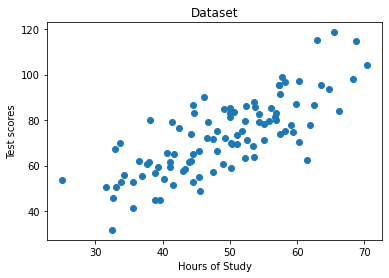

In [7]:
plt.scatter(x,y)
plt.xlabel("Hours of Study")
plt.ylabel("Test scores")
plt.title("Dataset")
plt.show()

In [8]:
# define the parameters
learning_rate = 0.0001
initial_b = 0
initial_m = 0
num_iterations = 10

In [10]:
# define the cost function
def compute_cost(b, m, points):
    total_cost = 0
    N = float(len(points))
    
    #compute the sum of squated errors
    for i in range (0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        total_cost += (y - (m * x + b)) ** 2
        
    # return the average of squared errors
    return total_cost/N

In [12]:
# gradien Decent
def gradient_decent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    cost_graph = []
    
    # for every iteration, optimize b, m and compute its cost
    for i in range(num_iterations):
        cost_graph.append(compute_cost(b, m, points))
        b, m = step_gradient(b, m, array(points), learning_rate)
        
    return [b, m, cost_graph]

def step_gradient(b_current, m_current, points, learning_rate):
    m_gradient = 0
    b_gradient = 0
    N = float(len(points))
    
    # Calculate Gradient
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        m_gradient += -(2/N) * x * (y - (m_current * x + b_current))
        b_gradient += -(2/N) * (y - (m_current * x + b_current))
        
    #update current m, b
    m_update = m_current - learning_rate * m_gradient
    b_update = b_current - learning_rate * b_gradient
    
    return b_update, m_update    

In [13]:
b, m, cost_graph = gradient_decent_runner(points, initial_b, initial_m, learning_rate, num_iterations)

# print optimized parameters
print('Optimized b:', b)
print('Optimized m:', m)

# print error with optimized parameters
print('Minimized cost:', compute_cost(b, m, points))

Optimized b: 0.02963934787473239
Optimized m: 1.4774173755483797
Minimized cost: 112.65585181499746


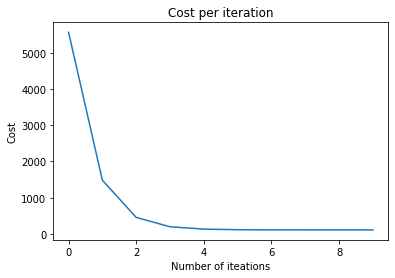

In [14]:
plt.plot(cost_graph)
plt.xlabel('Number of iteations')
plt.ylabel('Cost')
plt.title('Cost per iteration')
plt.show()

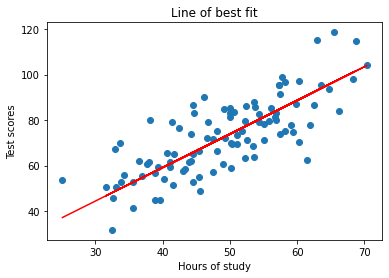

In [16]:
plt.scatter(x,y)
pred = m * x + b
# Line of best fit
plt.plot(x, pred, c = 'r')
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Line of best fit')
plt.show()